# PRÁCTICA Machine Learning - IA2:
## Objetivo → predecir el precio del airbnb utilizando el dataset airbnb-listings-extract.csv
Variable objetivo (target) = PRICE


In [1]:
from utils import plot_confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 0. Cargar Dataset y primer vistazo:

In [2]:
# Cargamos el dataset airbnb-listings-extract.csv en un dataframe:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')
#mostramos las primeras filas del dataset para un primer vistazo de los datos:
data.head(10)



,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."
8,15698621,https://www.airbnb.com/rooms/15698621,20170407214050,2017-04-08,98. Enamorats,"Unique apartment in vibrant neighborhoods, car...",Fantastic apartment located 7 minutes from the...,"Unique apartment in vibrant neighborhoods

En este primer vistazo se puede apreciar que hay columnas con valores nulos: Neighborhood Overview, Review Scores Communication, Review Scores Location,
Review Scores Value, License, Jurisdiction Names y Reviews per Month.

Tambien podemos intuir que algunas variables no van a ser precisas en nuestro modelo para predecir el precio como por ejemplo: ID, Listing Url, Scrape ID incluso podria ser inutil para nuestro caso la columna last scraped, sin embargo, en otro caso de uso más real podría indicarnos si los datos son más o menos recientes, si estan o no desactualizados. 

# 1.Preparación de datos: División train/test:

In [3]:
from sklearn.model_selection import train_test_split
# Dividimos los datos en variables (X) y variable objetivo (y)
X = data.drop(columns=['Price'],axis=1)
y = data['Price']

# Separamos los datos en conjuntos de train y test:
train, test = train_test_split(data, random_state=42, test_size=0.2, shuffle=True)

# Comprobamos el tamaño de train y test:
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Creamos dos dataset separando train y test:
train.to_csv('airbnb_train.csv', sep=';', index=False)
test.to_csv('airbnb_test.csv', sep=';', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


# 2.Analisis exploratoriio:

## 2.1 Importar datos:

In [4]:
#cargamos el dataset de train:
train_data = pd.read_csv('airbnb_train.csv', sep=';', decimal='.')
train_data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,8494011,https://www.airbnb.com/rooms/8494011,20170407214119,2017-04-08,CITY CENTER LATINA B ROOM 2,"Se trata de un gran piso de diez habitaciones,...",Todas las camas del piso son de matrimonio. Se...,"Se trata de un gran piso de diez habitaciones,...",none,Se trata de una de las zonas más emblemáticas ...,...,10.0,10.0,10.0,NaN,NaN,strict,97.0,0.11,"40.4102231405,-3.70867805612","Host Has Profile Pic,Is Location Exact,Require..."
1,16865230,https://www.airbnb.com/rooms/16865230,20170407214119,2017-04-08,Tu SUITE en el corazón de MALASAÑA,The apartment in Madrid has 1 bedrooms and has...,The apartment in Madrid has 1 bedrooms and has...,The apartment in Madrid has 1 bedrooms and has...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.4272898629,-3.70437160544","Host Has Profile Pic,Host Identity Verified,Re..."
2,9695108,https://www.airbnb.com/rooms/9695108,20170507222235,2017-05-08,Room in amazing Kreuzberg-Neukoln,Renting my room at Weserstrasse during Christm...,NaN,Renting my room at Weserstrasse during Christm...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"52.4832726772,13.4425265568","Host Has Profile Pic,Host Identity Verified,Is..."
3,18088037,https://www.airbnb.com/rooms/18088037,20170407214119,2017-04-08,Habitación con balcón en la Latina!,Habitación acogedora en un apartamento con enc...,Estudiantes y jóvenes profesionales,Habitación acogedora en un apartamento con enc...,none,El piso está ubicado en el famoso barrio de La...,...,NaN,NaN,NaN,NaN,NaN,strict,38.0,NaN,"40.4123714758,-3.71252881444","Host Has Profile Pic,Host Identity Verified,Is..."
4,3137010,https://www.airbnb.com/rooms/3137010,20170315084710,2017-03-15,Vista Hermosa-Apartment,"1 Bedroom (with bathroom) opens to the big, mi...",1-Bedroom apartment with amazing views. Fall a...,"1 Bedroom (with bathroom) opens to the big, mi...",none,Vista Hermosa like the majority of buildings i...,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,1.58,"39.3674540905,3.22948720166","Host Has Profile Pic,Is Location Exact,Require..."


## 2.2 Visualizamos la estructura del dataset:

In [5]:
# Dimensiones del DataFrame (número de filas y columnas)
print(f"Dimensiones: {train_data.shape}")

# Nombre de las columnas y tipos de datos
print("Tipos de datos:")
print(train_data.dtypes)

# Resumen de información del DataFrame
train_data.info()


Dimensiones: (11824, 89)
Tipos de datos:
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  obje

De este analisis podemos observar que de las 89 columnas
- 23 son de tipo flotante
- 13 son variables de tipo entero y
- 53 son variable categóricas

así como qu emuchas de ellas presentan valores nulos.

### 2.3 Visualizamos contenido variables categóricas:

In [6]:
# Estadísticas para columnas categóricas
categorical_columns = train_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Columna: {col}")
    print(train_data[col].value_counts())
    print("\n")


Columna: Listing Url
Listing Url
https://www.airbnb.com/rooms/8494011     1
https://www.airbnb.com/rooms/3744628     1
https://www.airbnb.com/rooms/14601715    1
https://www.airbnb.com/rooms/2527911     1
https://www.airbnb.com/rooms/1699883     1
                                        ..
https://www.airbnb.com/rooms/4475410     1
https://www.airbnb.com/rooms/11833441    1
https://www.airbnb.com/rooms/16440188    1
https://www.airbnb.com/rooms/7211478     1
https://www.airbnb.com/rooms/14344571    1
Name: count, Length: 11824, dtype: int64


Columna: Last Scraped
Last Scraped
2017-04-08    10920
2017-03-15      293
2017-05-09       85
2017-03-05       77
2017-05-03       61
2017-04-05       55
2017-05-08       45
2017-03-04       41
2017-02-18       32
2017-04-02       26
2017-05-04       26
2017-04-04       26
2017-04-06       22
2017-04-03       17
2017-05-11       10
2017-05-10       10
2017-06-03        9
2017-06-15        9
2016-01-04        8
2017-05-02        7
2016-07-09      

In [7]:
print(train_data['Features'])

0        Host Has Profile Pic,Is Location Exact,Require...
1        Host Has Profile Pic,Host Identity Verified,Re...
2        Host Has Profile Pic,Host Identity Verified,Is...
3        Host Has Profile Pic,Host Identity Verified,Is...
4        Host Has Profile Pic,Is Location Exact,Require...
                               ...                        
11819                Host Has Profile Pic,Requires License
11820    Host Has Profile Pic,Host Identity Verified,Re...
11821                Host Has Profile Pic,Requires License
11822    Host Has Profile Pic,Host Identity Verified,Is...
11823    Host Has Profile Pic,Host Identity Verified,Is...
Name: Features, Length: 11824, dtype: object


In [8]:
# Seleccionar columnas categóricas automáticamente
categorical_columns2 = train_data.select_dtypes(include='object').columns.tolist()

# Contar las categorías
categorical_counts = train_data[categorical_columns2].nunique()

print(categorical_counts)
print(categorical_counts.shape)
print(len(categorical_columns2))

Listing Url                     11824
Last Scraped                       37
Name                            11545
Summary                         10680
Space                            8158
Description                     11456
Experiences Offered                 5
Neighborhood Overview            6395
Notes                            3766
Transit                          6333
Access                           5729
Interaction                      5332
House Rules                      6501
Thumbnail Url                    9538
Medium Url                       9538
Picture Url                     11804
XL Picture Url                   9538
Host URL                         7499
Host Name                        2881
Host Since                       2048
Host Location                     497
Host About                       4225
Host Response Time                  4
Host Acceptance Rate               11
Host Thumbnail Url               7467
Host Picture Url                 7467
Host Neighbo

In [9]:
# 3. Filtrar las columnas que tienen menos de 50 categorías
filtered_categorical_columns = categorical_counts[categorical_counts < 50].index.tolist()

# Mostrar las columnas filtradas
print("Columnas categóricas con menos de 50 categorías:")
print(filtered_categorical_columns)


# Si quieres ver también el número de categorías
print("\nNúmero de categorías en las columnas filtradas:")
print(categorical_counts[filtered_categorical_columns])

print(f'De las 46 variables categóricas: {len(filtered_categorical_columns)} tienen menos de 50 categorías.')

Columnas categóricas con menos de 50 categorías:
['Last Scraped', 'Experiences Offered', 'Host Response Time', 'Host Acceptance Rate', 'Neighbourhood Group Cleansed', 'Market', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Has Availability', 'Calendar last Scraped', 'Jurisdiction Names', 'Cancellation Policy']

Número de categorías en las columnas filtradas:
Last Scraped                    37
Experiences Offered              5
Host Response Time               4
Host Acceptance Rate            11
Neighbourhood Group Cleansed    48
Market                          41
Country Code                    18
Country                         17
Property Type                   22
Room Type                        3
Bed Type                         5
Has Availability                 1
Calendar last Scraped           38
Jurisdiction Names              12
Cancellation Policy              8
dtype: int64
De las 46 variables categóricas: 15 tienen menos de 50 categorías.


## 2.4 Obtenemos estadísticas descriptivas de las variables numéricas del dataframe:

In [10]:
train_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10286.000000,11822.000000,11822.000000,11824.000000,11824.000000,11824.000000,11778.000000,...,11824.000000,9169.000000,9149.000000,9154.000000,9142.000000,9156.000000,9139.000000,9139.000000,11821.000000,9283.000000
mean,1.026022e+07,2.017037e+13,3.605968e+07,94.742660,12.542294,12.542294,40.497385,-3.838638,3.264970,1.281245,...,22.465071,91.684371,9.412723,9.327616,9.618792,9.645151,9.532662,9.212058,9.478048,1.865575
std,5.557168e+06,5.726876e+08,3.417099e+07,15.337695,34.215496,34.215496,4.590549,14.010897,2.091109,0.656424,...,37.715834,9.034297,0.930438,0.990421,0.801247,0.770007,0.777009,0.958257,23.630338,1.864372
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.556205e+06,2.017041e+13,6.773300e+06,99.000000,1.000000,1.000000,40.409737,-3.707535,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.123371e+07,2.017041e+13,2.468248e+07,100.000000,2.000000,2.000000,40.419453,-3.700769,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.190000
75%,1.531757e+07,2.017041e+13,5.434329e+07,100.000000,6.000000,6.000000,40.430843,-3.684171,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858124e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


De esta descrición podemos sacar algunas características del dataset:
1. Observamos como no todas las columnas tienen menos filas que otras lo que nos puede indicar que están incompletas por valores nulos, incorrectos, vacías,etc.
2. Podemos observar la presencia de posibles outliers al comparar máximo y media: máximo de  accommodates la media es de 3.2 y el máximo de 16, o que la media sea de 1.2 baños y el máximo de 8.
3. En la variable Host Listings Count, el 75% de los anfitriones tienen 6 o menos propiedades, pero el valor máximo es 519, lo cual sugiere que algunos anfitriones tienen muchas más que la mayoría, podria tratarse de otro outlier.

In [11]:
# vamos a ver los tipos de las categorias:
train_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

como sonmuchas columnas vamos a visualizarlas filtrando por tipos:

In [12]:
# resumen:
train_data.dtypes.value_counts()

object     53
float64    23
int64      13
Name: count, dtype: int64

In [13]:
# columnas categoricas:
object_columns = train_data.select_dtypes(include=['object']).columns
print(f' En el dataset hay {len(object_columns)} variables categoricas: {object_columns}')

 En el dataset hay 53 variables categoricas: Index(['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Has Availability', 'Calendar last Scraped',
       'First Review', 'Last Review', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='

In [14]:
# columnas de enteros:
int_columns = train_data.select_dtypes(include=['int64']).columns
print(f' En el dataset hay {len(int_columns)} variables numericas tipo int: {int_columns}')

 En el dataset hay 13 variables numericas tipo int: Index(['ID', 'Scrape ID', 'Host ID', 'Accommodates', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews'],
      dtype='object')


In [15]:
# columnas de flotantes:
float_columns = train_data.select_dtypes(include=['float64']).columns
print(f' En el dataset hay {len(float_columns)} variables numericas tipo float: {float_columns}')

 En el dataset hay 23 variables numericas tipo float: Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')


## ELIMINO COLUMNAS:
- Basandome en la exploración inicil de los datos voy a liminar las siguientes columnas:
  - ID	
  - Scrape ID	
  - Host ID
  	

In [16]:
#eliminamos columnas:
train_data = train_data.drop(['ID', 'Host ID'], axis=1)

## 2.5 Comprobación de nulos:

In [17]:
train_data.isnull().any()

Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
Summary                            True
                                  ...  
Cancellation Policy               False
Calculated host listings count     True
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 87, dtype: bool

In [18]:
train_data['Price'].isnull().any()

True

In [19]:
# Calculamos el porcentaje de valores nulos para cada columna:
null_data = train_data.isnull().mean() * 100

# Filtramos para mostrar solo las columnas que tienen valores nulos:
null_columns = null_data[null_data > 0]

# Obtenemos los tipos de datos de las columnas que tienen nulos:
null_dtypes = data.dtypes[null_columns.index]

# Crear un DataFrame con el porcentaje de nulos y el tipo de datos
nulls_and_types = pd.DataFrame({'Porcentaje Nulos': null_columns, 'Tipo de Dato': null_dtypes})

# cambiamos el porcentaje a dos decomales: 
nulls_and_types['Porcentaje Nulos'] = nulls_and_types['Porcentaje Nulos'].apply(lambda x: f'{x:.2f}')

# Mostrar las columnas con valores nulos y su porcentaje:

print(nulls_and_types)
print(f'Las columnas que tienen nulos son un total de {len(null_columns)}/89') 

                               Porcentaje Nulos Tipo de Dato
Name                                       0.01       object
Summary                                    4.06       object
Space                                     26.67       object
Description                                0.05       object
Neighborhood Overview                     38.53       object
Notes                                     62.25       object
Transit                                   39.05       object
Access                                    44.23       object
Interaction                               44.57       object
House Rules                               35.10       object
Thumbnail Url                             19.32       object
Medium Url                                19.32       object
Picture Url                                0.15       object
XL Picture Url                            19.32       object
Host Name                                  0.02       object
Host Since              

In [20]:
# variables con el 50% de nulos o más:
nulls_and_types['Porcentaje Nulos'] = pd.to_numeric(nulls_and_types['Porcentaje Nulos'], errors='coerce')
null_D50 = nulls_and_types[nulls_and_types['Porcentaje Nulos'] >= 50]

print(null_D50)
print(f'Las columnas que tienen un 50% o más nullos son un total de {len(null_D50)}') 

                      Porcentaje Nulos Tipo de Dato
Notes                            62.25       object
Host Acceptance Rate             99.72       object
Square Feet                      96.02      float64
Weekly Price                     75.60      float64
Monthly Price                    75.79      float64
Security Deposit                 57.85      float64
Has Availability                 99.91       object
License                          97.71       object
Jurisdiction Names               98.51       object
Las columnas que tienen un 50% o más nullos son un total de 9


Tras este analisis hemos podido comprobar como las variable con nulos son 59 de las 85 que tenemos tras eliminar las primeras anteriormente(que no tenian nulos)

de las 59 variables con nulos 9 de ellas tienen un 50% o más de valores nulos, por tanto vamos a eliminarlas.

## ELIMINO COLUMNAS => 50% NULOS:
Notes                            62.25       
Host Acceptance Rate             99.72       
Square Feet                      96.02      
Weekly Price                     75.60      
Monthly Price                    75.79      
Security Deposit                 57.85     
Has Availability                 99.91       
License                          97.71       
Jurisdiction Names               98.51

In [21]:
train_data = train_data.drop(['Notes', 'Host Acceptance Rate', 'Square Feet','Weekly Price','Monthly Price'
                             ,'Security Deposit','Has Availability','License', 'Jurisdiction Names'], axis=1)                         

In [22]:
# Vamos a crear una lista con la columnas contengan nulos:
null_data = train_data.isnull().any()
null_columns=[null_data.index]
print(null_columns)
print(f'despues de haber eliminado nos quedamos con un total de {len(null_data)} columnas que contienen valores nulos')

[Index(['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
      

## 2.6 Completar nulos (fillna):

In [23]:
# Para cada columna numérica rellenamos con la mediana y para las categoricas con unknown:
null_columns = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation',
       'Features']

for col in null_columns:
    if train_data[col].dtype == 'float64' or train_data[col].dtype == 'int64':  # Para columnas numéricas
        train_data[col].fillna(train_data[col].median(), inplace=True)
    else:
        train_data[col].fillna('UNKNOWN', inplace=True)  # Para columnas categóricas

# Verificamos si quedan valores nulos
print(train_data.isnull().sum())

Listing Url                       0
Scrape ID                         0
Last Scraped                      0
Name                              0
Summary                           0
                                 ..
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Geolocation                       0
Features                          0
Length: 78, dtype: int64


## 2.7 Codificación variables categóricas

In [24]:
object_columns = train_data.select_dtypes(include=['object']).columns
print(f' En el dataset hay {len(object_columns)} variables categoricas: {object_columns}')

 En el dataset hay 48 variables categoricas: Index(['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Calendar last Scraped', 'First Review',
       'Last Review', 'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')


In [25]:
train_data['Amenity_count'] = train_data['Amenities'].apply(lambda x: len(x.split(',')))

In [26]:
train_data=train_data.drop(['Amenities'],axis=1)

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Listing Url                     11824 non-null  object 
 1   Scrape ID                       11824 non-null  int64  
 2   Last Scraped                    11824 non-null  object 
 3   Name                            11824 non-null  object 
 4   Summary                         11824 non-null  object 
 5   Space                           11824 non-null  object 
 6   Description                     11824 non-null  object 
 7   Experiences Offered             11824 non-null  object 
 8   Neighborhood Overview           11824 non-null  object 
 9   Transit                         11824 non-null  object 
 10  Access                          11824 non-null  object 
 11  Interaction                     11824 non-null  object 
 12  House Rules                     

In [28]:
!pip install category_encoders

In [29]:
import category_encoders as ce

# Definir las columnas categóricas
object_columns = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Calendar Updated', 'Calendar last Scraped','Cancellation Policy', 'Geolocation', 'Features']


# Definir la columna objetivo (asegúrate de que 'target_column' sea tu variable objetivo)
target_column = 'Price'

# Crear el codificador Target Encoder
target_encoder = ce.TargetEncoder(cols=object_columns)

# Aplicar el target encoding a las columnas categóricas
train_data_encoded = target_encoder.fit_transform(train_data[object_columns], train_data[target_column])

# Reemplazar las columnas originales con las columnas codificadas
train_data[object_columns] = train_data_encoded

# Ver las primeras filas del dataframe resultante
train_data.head()

,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Transit,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Amenity_count
0,66.639031,20170407214119,68.646520,66.639031,59.814100,59.814100,60.724500,73.581139,36.477995,43.815196,...,10.0,10.0,10.0,10.0,86.796787,97.0,0.11,66.639031,61.421673,11
1,75.226190,20170407214119,68.646520,75.226190,75.226190,75.226190,75.226190,73.581139,77.864794,81.544293,...,10.0,10.0,10.0,9.0,86.796787,1.0,1.19,75.226190,72.929955,13
2,72.624021,20170507222235,61.525667,72.624021,72.624021,68.092927,72.624021,73.581139,77.864794,81.544293,...,10.0,10.0,10.0,9.0,63.597639,1.0,1.19,72.624021,119.484848,10
3,67.940116,20170407214119,68.646520,67.940116,67.427965,57.676975,67.427965,73.581139,66.980777,66.980777,...,10.0,10.0,10.0,9.0,86.796787,38.0,1.19,67.940116,71.944666,11
4,77.047709,20170315084710,180.822526,77.047709,77.047709,77.047709,77.047709,73.581139,77.047709,77.047709,...,10.0,10.0,10.0,9.0,86.796787,1.0,1.58,77.047709,61.421673,9


In [30]:
# ya tenemos todas las variables en numérico
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Listing Url                     11824 non-null  float64
 1   Scrape ID                       11824 non-null  int64  
 2   Last Scraped                    11824 non-null  float64
 3   Name                            11824 non-null  float64
 4   Summary                         11824 non-null  float64
 5   Space                           11824 non-null  float64
 6   Description                     11824 non-null  float64
 7   Experiences Offered             11824 non-null  float64
 8   Neighborhood Overview           11824 non-null  float64
 9   Transit                         11824 non-null  float64
 10  Access                          11824 non-null  float64
 11  Interaction                     11824 non-null  float64
 12  House Rules                     

## 2.8 Histogramas

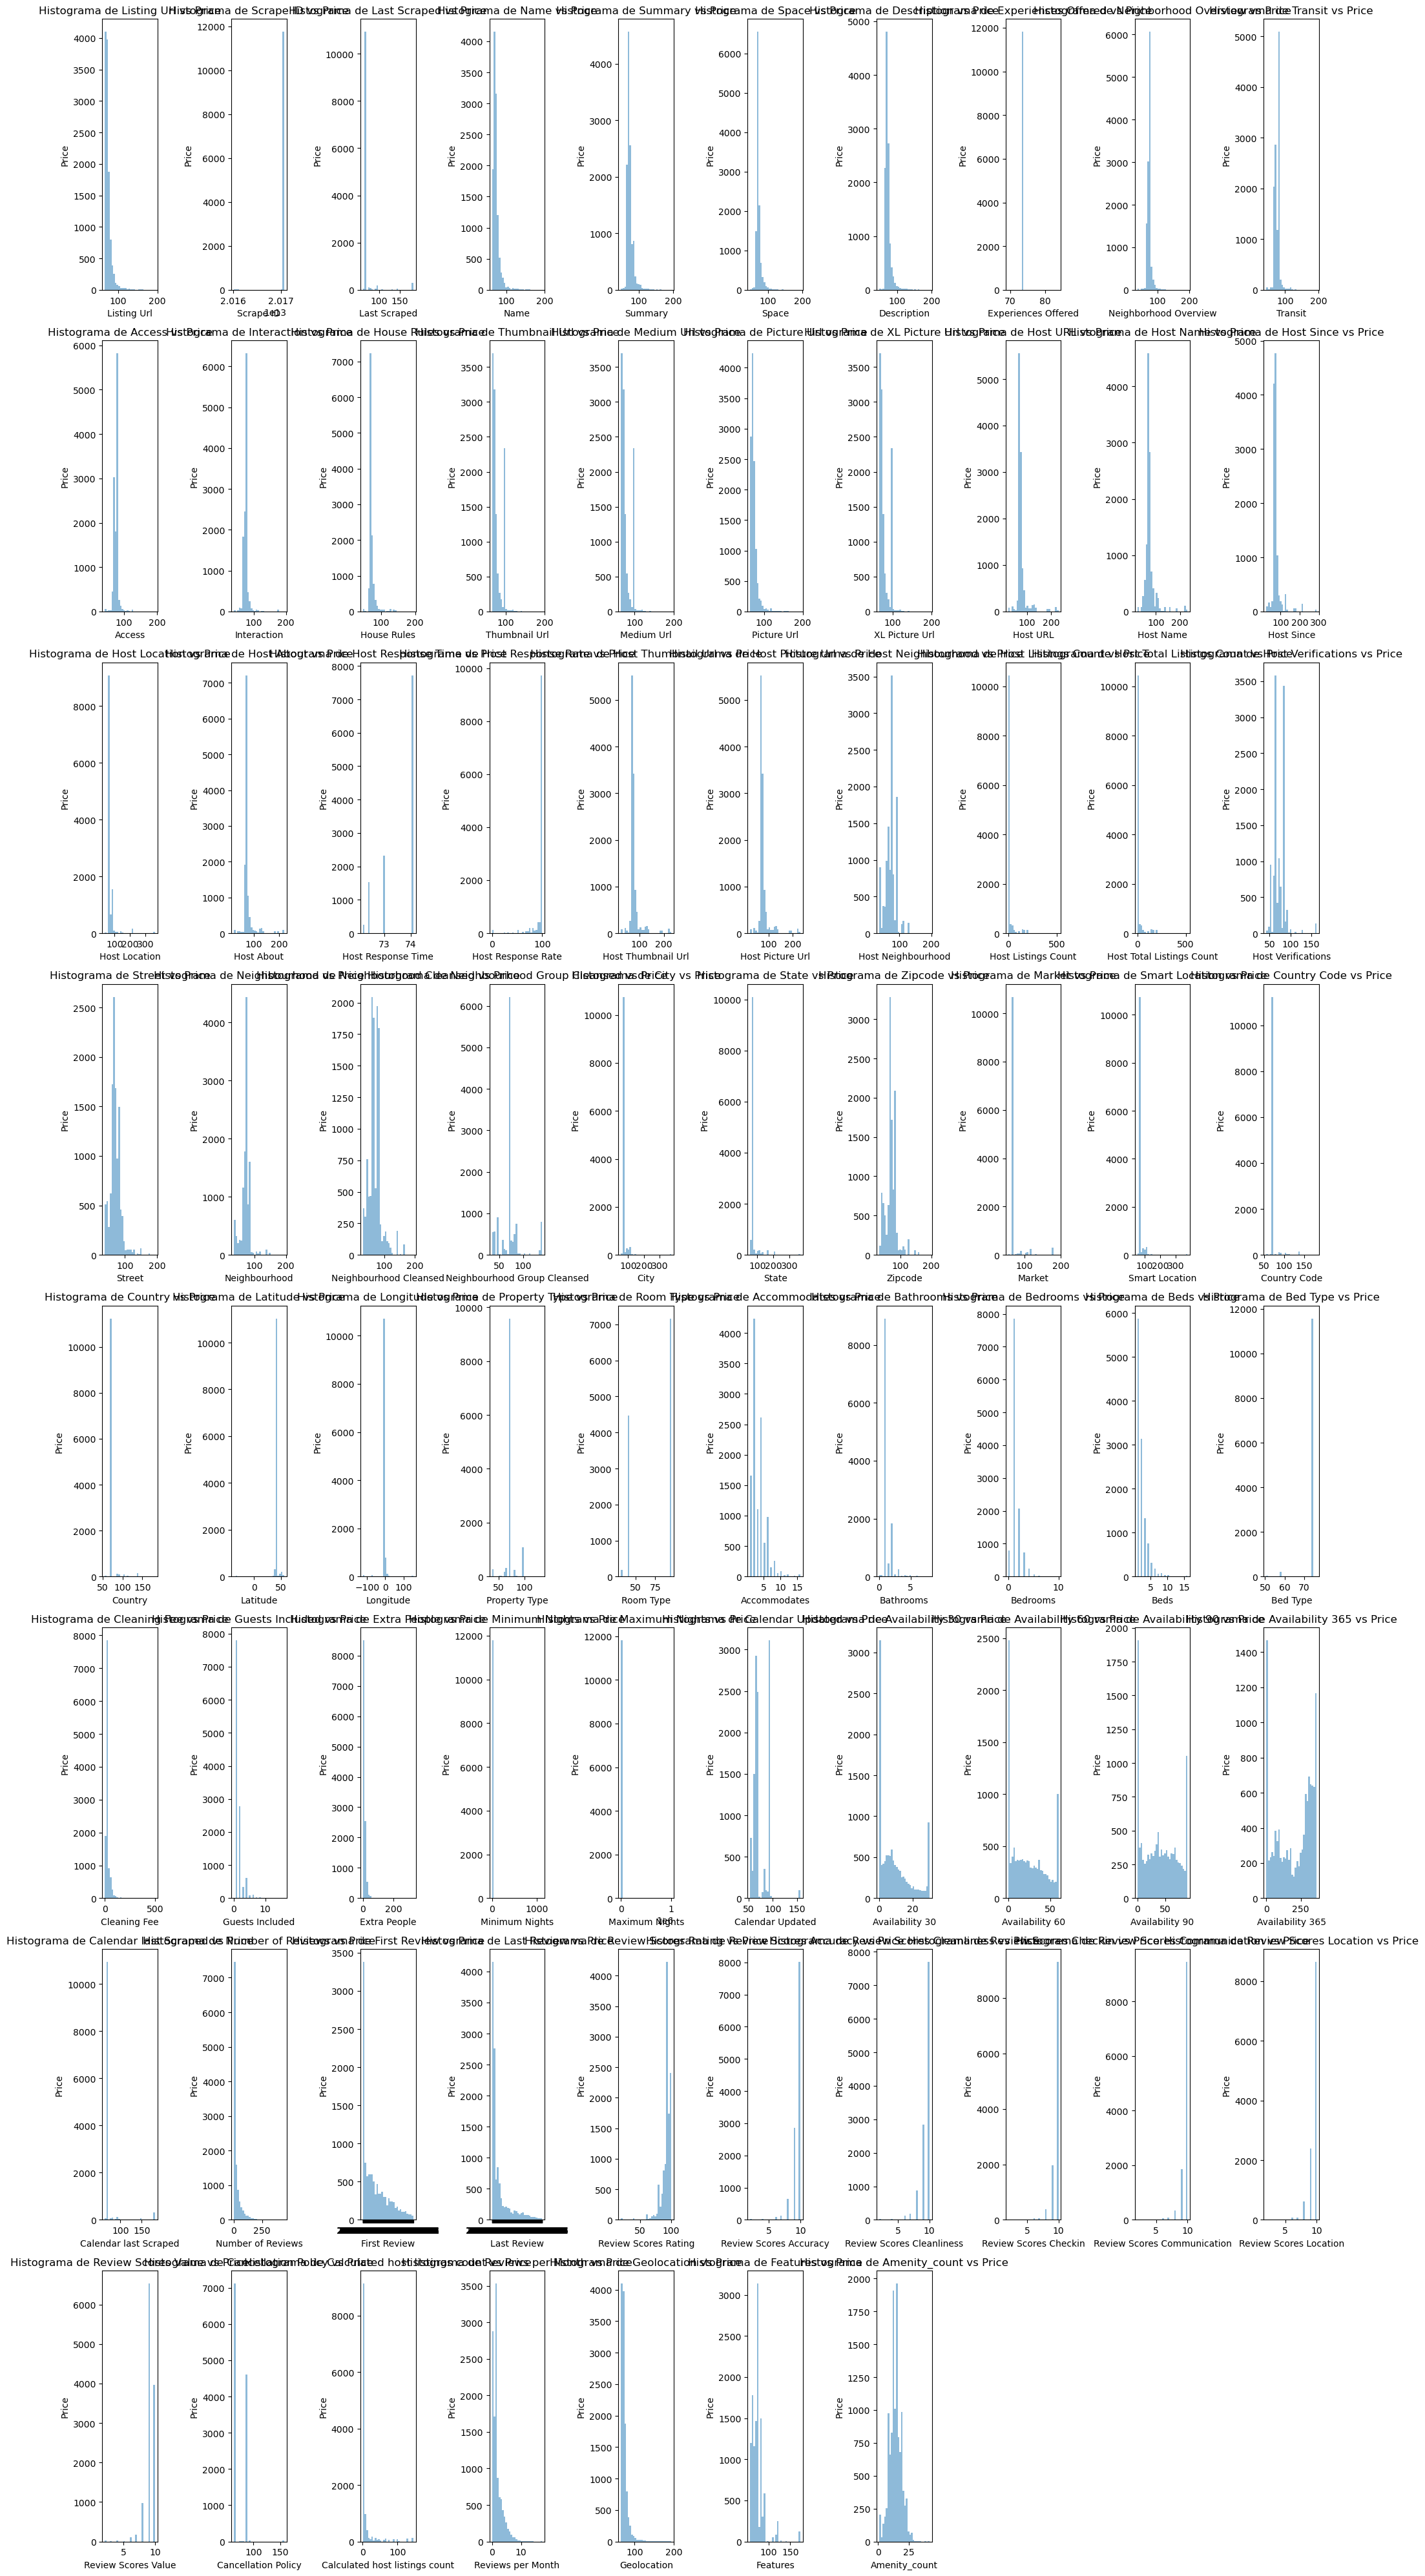

In [31]:
# Definimos la variable objetivo:
target_column = 'Price'  

# Eliminamos la columna objetivo de las variables predictoras:
predictor_columns = train_data.drop(columns=[target_column]).columns

# Definir el número de filas y columnas en la cuadrícula de gráficos
n_cols = 10  # Número de columnas en los gráficos
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Número de filas

# Crear un objeto figure para organizar los subplots
fig, axes = plt.subplots(n_rows, n_cols,figsize=(20,40))

# Flatten para acceder a los ejes como una lista (en lugar de matriz)
axes = axes.flatten()

# Graficar cada predictor con respecto a la variable objetivo
for i, col in enumerate(predictor_columns):
    # Crear histogramas directamente con plt.hist
    axes[i].hist(train_data[col].dropna(), bins=30, alpha=0.5)
    axes[i].set_title(f'Histograma de {col} vs {target_column}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_column)

# Eliminar ejes vacíos (si sobran ejes)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.show()

In [32]:
train_data.shape

(11824, 78)

## 2.9 Matriz de correlación

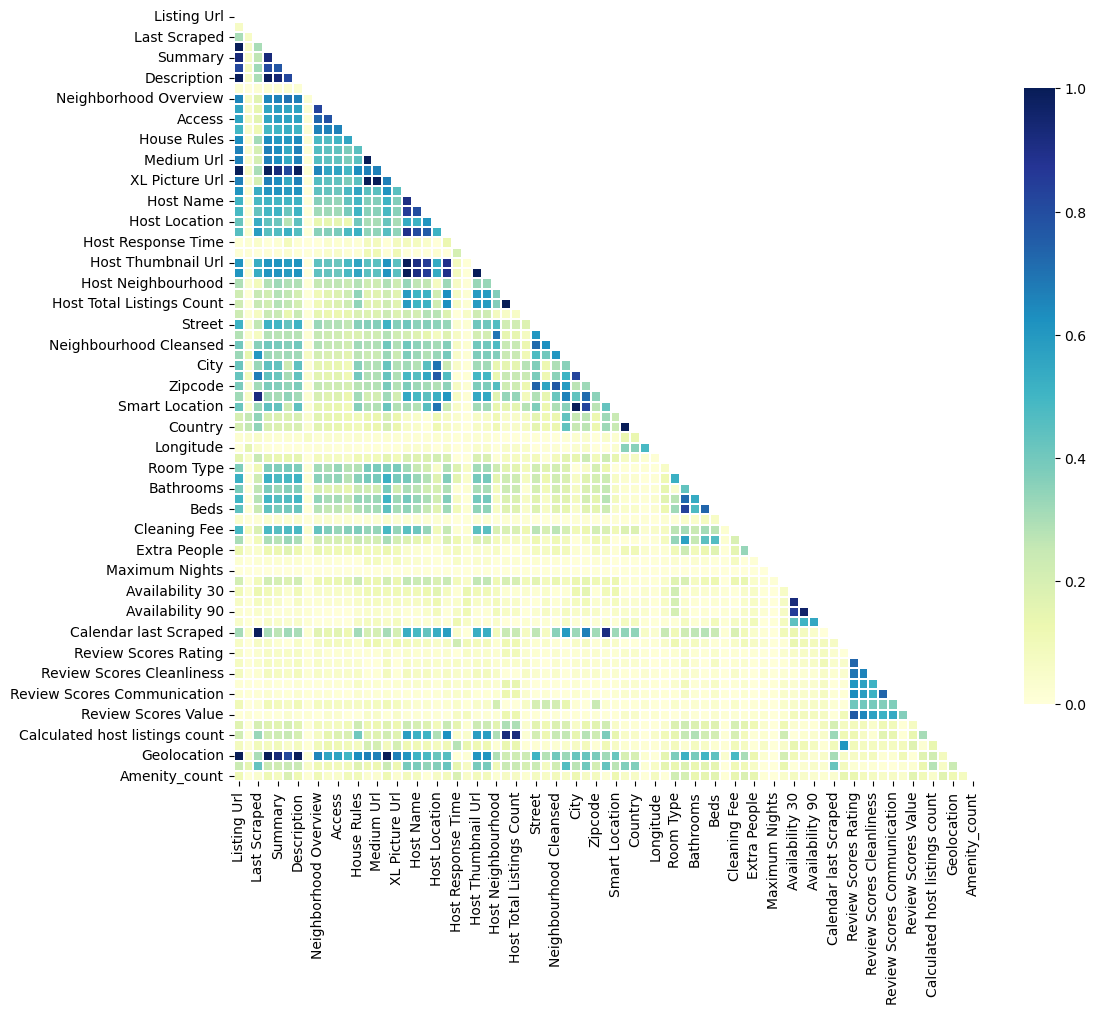

In [33]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(train_data.drop(['Price','Last Review','First Review'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [34]:
 #Matriz de correlación
correlation_matrix = train_data.drop(['Last Review','First Review'], axis=1).corr()

# Mostrar la matriz de correlación
correlation_matrix

,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Transit,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Amenity_count
Listing Url,1.000000,-0.065987,0.303814,0.996209,0.930323,0.817969,0.991278,0.020425,0.654565,0.558513,...,0.017092,0.027122,0.102156,0.008619,0.171198,0.218187,-0.082311,1.000000,0.237750,0.114964
Scrape ID,-0.065987,1.000000,-0.060239,-0.065402,-0.057605,-0.075865,-0.065012,-0.003268,-0.059407,-0.050715,...,-0.004636,-0.010102,-0.003607,-0.017647,0.006580,0.009830,-0.016041,-0.065987,-0.151323,-0.010688
Last Scraped,0.303814,-0.060239,1.000000,0.301188,0.265161,0.316679,0.299126,0.020313,0.164289,0.144711,...,0.000141,0.011940,-0.022842,0.003169,0.201796,0.330164,-0.096766,0.303814,0.426932,0.035978
Name,0.996209,-0.065402,0.301188,1.000000,0.929471,0.807076,0.989938,0.020249,0.646157,0.551956,...,0.017548,0.027446,0.101988,0.008492,0.168133,0.215810,-0.081008,0.996209,0.238081,0.110082
Summary,0.930323,-0.057605,0.265161,0.929471,1.000000,0.771401,0.939740,0.018126,0.659445,0.579495,...,0.006373,0.014580,0.089455,0.004772,0.163387,0.229149,-0.094723,0.930323,0.222738,0.075406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Calculated host listings count,0.218187,0.009830,0.330164,0.215810,0.229149,0.248396,0.203591,-0.005772,0.067628,0.144965,...,-0.162833,-0.142787,-0.009815,-0.137873,0.306513,1.000000,-0.138591,0.218187,0.278098,-0.043057
Reviews per Month,-0.082311,-0.016041,-0.096766,-0.081008,-0.094723,-0.047623,-0.078388,-0.011112,-0.095231,-0.123012,...,0.078544,0.076495,0.089243,0.172394,0.021770,-0.138591,1.000000,-0.082311,0.060749,0.164937
Geolocation,1.000000,-0.065987,0.303814,0.996209,0.930323,0.817969,0.991278,0.020425,0.654565,0.558513,...,0.017092,0.027122,0.102156,0.008619,0.171198,0.218187,-0.082311,1.000000,0.237750,0.114964
Features,0.237750,-0.151323,0.426932,0.238081,0.222738,0.241742,0.239009,0.052247,0.112828,0.106366,...,-0.010809,-0.000267,-0.022398,0.025844,0.132058,0.278098,0.060749,0.237750,1.000000,0.080506


## 2.10 Selección de Variables:

In [35]:
train2 = train_data.drop(['Last Review','First Review'],axis=1)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definimos X e y

X = train2.drop(columns=[target_column])
y= train2[target_column]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el modelo Lasso
lasso = Lasso()  

# Definimos el rango de valores de alpha que queremos probar
alpha_values = {'alpha': np.logspace(-4, 0, 50)}  # 50 valores entre 0.0001 y 1

# Configuramos el GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustamos el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtenemos los mejores parámetros
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Evaluamos el rendimiento del modelo en el conjunto de validación
y_pred = grid_search.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"MSE en el conjunto de prueba: {mse}")


Mejor valor de alpha: 0.0001
MSE en el conjunto de prueba: 1.0485118652724647e-10


In [37]:
# Aplicamos Lasso:
lasso = Lasso(alpha=best_alpha)  
lasso.fit(X_train, y_train)

# las variables seleccionadas:
selected_features = X_train.columns[(lasso.coef_ != 0)]
print(f"Variables seleccionadas con Lasso:\n{selected_features}")

Variables seleccionadas con Lasso:
Index(['Listing Url', 'Scrape ID', 'Name', 'Description', 'Host URL',
       'Host Thumbnail Url', 'Host Picture Url', 'Cleaning Fee'],
      dtype='object')


### ELIMINO VARIABLES:

In [38]:
train_data = train_data.drop(['Listing Url', 'Scrape ID', 'Name', 'Description', 'Host URL',
       'Host Thumbnail Url', 'Host Picture Url'], axis=1)

### Seleccion de variables 

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=2; total time=   1.0s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.0s
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.2s
[CV] END ........................................max_depth=4; total time=   1.6s
[CV] END ........................................max_depth=4; total time=   1.6s
[CV] END .......................................

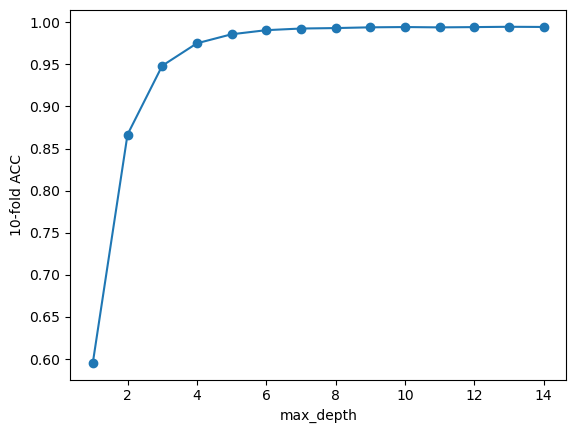

In [39]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

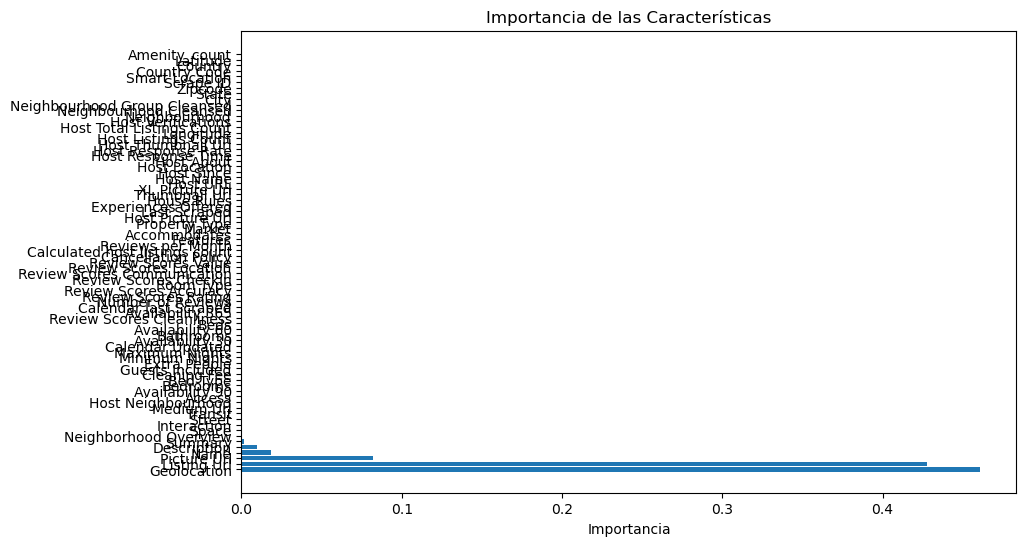

Variables eliminadas por baja importancia: ['Description', 'Summary', 'Neighborhood Overview', 'Space', 'Interaction', 'Street', 'Transit', 'Medium Url', 'Host Neighbourhood', 'Access', 'Availability 90', 'Bedrooms', 'Bed Type', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Availability 30', 'Bathrooms', 'Availability 60', 'Beds', 'Review Scores Cleanliness', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Room Type', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Features', 'Accommodates', 'Market', 'Property Type', 'Host Picture Url', 'Last Scraped', 'Experiences Offered', 'House Rules', 'Thumbnail Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Re

In [40]:
# Dividimos las variables predictoras y la variable objetivo
X = train2.drop(columns=['Price']) 
y = train2['Price']

# Entrenamos un modelo Random Forest
rf = RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42)
rf.fit(X, y)

# Obtenemos la importancia de las características
importances = rf.feature_importances_

# Creamos un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Definimos un umbral de importancia para eliminar variables
threshold = 0.01
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']

# Graficamos las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()

# Imprimimos las variables de baja importancia
print(f"Variables eliminadas por baja importancia: {list(low_importance_features)}")


In [41]:
# Calculamos la matriz de correlación
correlation_matrix = train2.corr().abs()

# Creamos una máscara para los valores de la diagonal (que son 1)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle_matrix = correlation_matrix.where(upper_triangle)

# Las columnas con correlación mayor a un umbral (por ejemplo, 0.9)
to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > 0.9)]


print(f"Variables eliminadas por multicolinealidad: {to_drop}")


Variables eliminadas por multicolinealidad: ['Name', 'Summary', 'Description', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Thumbnail Url', 'Host Picture Url', 'Host Total Listings Count', 'Market', 'Smart Location', 'Country', 'Price', 'Availability 60', 'Availability 90', 'Calendar last Scraped', 'Calculated host listings count', 'Geolocation']


## 2.11 Auto Proffiling:

si queremos generar un analisis automático de los datos:

In [42]:
#!pip install ydata-profiling
#!pip install ipywidgets
#from ydata_profiling import ProfileReport

    # Generamos un informe de profiling
#profile = ProfileReport(train_data, title="Profiling del dataset Airbnb", explorative=True)

#profile.to_widgets()


# 3.Preprocesamiento:

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Last Scraped                    11824 non-null  float64
 1   Summary                         11824 non-null  float64
 2   Space                           11824 non-null  float64
 3   Experiences Offered             11824 non-null  float64
 4   Neighborhood Overview           11824 non-null  float64
 5   Transit                         11824 non-null  float64
 6   Access                          11824 non-null  float64
 7   Interaction                     11824 non-null  float64
 8   House Rules                     11824 non-null  float64
 9   Thumbnail Url                   11824 non-null  float64
 10  Medium Url                      11824 non-null  float64
 11  Picture Url                     11824 non-null  float64
 12  XL Picture Url                  

## 3.1 Generación de variables:

In [44]:
# camas por habitación
train_data['Beds_per_Bedroom'] = train_data['Beds'] / train_data['Bedrooms']



In [45]:
# personas por baño
train_data['Guests_per_Bathroom'] = train_data['Accommodates'] / train_data['Bathrooms']

In [46]:
# Porcentaje de disponibilidad 
train_data['Availability_30_percent'] = (train_data['Availability 30']/30) * 100
train_data['Availability_60_percent'] = (train_data['Availability 60']/600) * 100
train_data['Availability_90_percent'] = (train_data['Availability 90']/90) * 100
train_data['Availability_365_percent'] = (train_data['Availability 365']/365) * 100

train_data['Availability_combined_percent'] = train_data[['Availability_30_percent', 'Availability_60_percent', 'Availability_90_percent', 'Availability_365_percent']].mean(axis=1)



In [47]:
# Score promedio:
review_columns = ['Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Communication', 
                  'Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Location', 'Review Scores Value']

train_data['Average_Review_Score'] = train_data[review_columns].mean(axis=1)

In [48]:
# días desde la primera reseña

train_data['First Review'] = pd.to_datetime(train_data['First Review'], errors='coerce')
train_data['Last Review'] = pd.to_datetime(train_data['Last Review'], errors='coerce')

train_data['Days_since_first_review'] = (train_data['Last Review'] - train_data['First Review']).dt.days
# Imputar los valores nulos con la mediana de la columna
train_data['Days_since_first_review'].fillna(train_data['Days_since_first_review'].median(), inplace=True)


## 3.2 Eliminación de variables:

Durante el análisis hemos eliminado las variables con una cantidad de nulos muy extensa más de 60%, y las variables que contien ID.
vamos a eliminar algunas variables más, basandonos en el análisis de los datos:
- Para la predicción del precio podemos eliminar las variables que no influyen en el como las variables qu econtienen url, experience offered y variables de la información personal del propietario.
- Tambien podemos eliminar variables como street, calendar last scraped, geolocation y features además de algunas descriptivas en las que se repite la información como summary, description, space, etc.
tambien geolocalización, ya que vamos a crear una variable nueva con latitud y longitud y luego de crearla eliminaremos estas. 
- tambien vamos a eliminar muchas de las variables relacionadas con la geolocalización ya que con zipcode se puede estimar el precio.
- vamos a eliminar las variables que tengan una variante de clean y nos quedaremos con esta.
- eliminaremos aquellas variables con gran correlación entre sí que no aporten más información.

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Last Scraped                    11824 non-null  float64       
 1   Summary                         11824 non-null  float64       
 2   Space                           11824 non-null  float64       
 3   Experiences Offered             11824 non-null  float64       
 4   Neighborhood Overview           11824 non-null  float64       
 5   Transit                         11824 non-null  float64       
 6   Access                          11824 non-null  float64       
 7   Interaction                     11824 non-null  float64       
 8   House Rules                     11824 non-null  float64       
 9   Thumbnail Url                   11824 non-null  float64       
 10  Medium Url                      11824 non-null  float64       
 11  Pi

In [50]:
#variable eliminadas con anterioridad:
'''
- train_data = train_data.drop(['ID', 'Host ID'], axis=1)
- train_data = train_data.drop(['Notes', 'Host Acceptance Rate', 'Square Feet','Weekly Price','Monthly Price'
                             ,'Security Deposit','Has Availability','License', 'Jurisdiction Names'], axis=1)  
- train_data = train_data.drop(['Listing Url', 'Scrape ID', 'Name', 'Description', 'Host URL',
                                   'Host Thumbnail Url', 'Host Picture Url'], axis=1)
'''

train_data = train_data.drop(['Last Scraped', 'Summary', 'Space', 'Experiences Offered', 'Neighborhood Overview',
                              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Listings Count',
                              'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Market', 'Smart Location', 'Country', 'Extra People', 
                              'Host Total Listings Count', 'Calendar last Scraped', 'Geolocation','Features'], axis=1)  


In [51]:
# eliminamos las variables que ya no sirven despues de crear nuevas:
train_data = train_data.drop(['Latitude','Longitude', 'Beds','Bedrooms','Bathrooms',
                             'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365','First Review',
                              'Last Review'],axis=1)

# 4.Modelado:

Regresión Lineal con Regularización (Lasso o Ridge)

Árboles de Decisión

K-Nearest Neighbors (KNN) para regresión

Random Forest

XGBoost (Gradient Boosting)

## 4.1 Cross validation:

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [53]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

# Lista para almacenar los resultados de GridSearchCV
grid_results = {}

# 1. Regresión Lineal Regularizada (Ridge)
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
grid_results['Ridge'] = ridge_grid.best_params_
print(f"Mejores parámetros Ridge: {ridge_grid.best_params_}, Mejor MSE: {-ridge_grid.best_score_:.2f}")

# 2. Lasso
lasso = Lasso()
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10]}
lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
grid_results['Lasso'] = lasso_grid.best_params_
print(f"Mejores parámetros Lasso: {lasso_grid.best_params_}, Mejor MSE: {-lasso_grid.best_score_:.2f}")

# 3. Árbol de Decisión
tree = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
tree_grid = GridSearchCV(tree, param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
tree_grid.fit(X_train, y_train)
grid_results['Decision Tree'] = tree_grid.best_params_
print(f"Mejores parámetros Árbol de Decisión: {tree_grid.best_params_}, Mejor MSE: {-tree_grid.best_score_:.2f}")

# 4. KNN para Regresión
knn = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
grid_results['KNN'] = knn_grid.best_params_
print(f"Mejores parámetros KNN: {knn_grid.best_params_}, Mejor MSE: {-knn_grid.best_score_:.2f}")

# 5. Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
grid_results['Random Forest'] = rf_grid.best_params_
print(f"Mejores parámetros Random Forest: {rf_grid.best_params_}, Mejor MSE: {-rf_grid.best_score_:.2f}")

# 6. XGBoost
xgboost = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
grid_results['XGBoost'] = xgb_grid.best_params_
print(f"Mejores parámetros XGBoost: {xgb_grid.best_params_}, Mejor MSE: {-xgb_grid.best_score_:.2f}")

Mejores parámetros Ridge: {'alpha': 0.1}, Mejor MSE: 0.00
Mejores parámetros Lasso: {'alpha': 0.001}, Mejor MSE: 0.00
Mejores parámetros Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}, Mejor MSE: 8.29
Mejores parámetros KNN: {'n_neighbors': 3}, Mejor MSE: 4789.94
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Mejor MSE: 3.82
Mejores parámetros XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}, Mejor MSE: 54.70


## 4.2 Evaluación 

In [54]:
from utils import plot_confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import ast

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

!pip install category_encoders


In [55]:
import category_encoders as ce

In [56]:

''' TRAIN '''
#caragar dataset:
train_data = pd.read_csv('airbnb_train.csv', sep=';', decimal='.')

#eliminar columnas ID:
train_data = train_data.drop(['ID', 'Host ID'], axis=1)
#eliminar columnas nulos:
train_data = train_data.drop(['Notes', 'Host Acceptance Rate', 'Square Feet','Weekly Price','Monthly Price'
                             ,'Security Deposit','Has Availability','License', 'Jurisdiction Names'], axis=1)
#rellenar nulos:
null_columns = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation',
       'Features']

for col in null_columns:
    if train_data[col].dtype == 'float64' or train_data[col].dtype == 'int64':  # Para columnas numéricas
        train_data[col].fillna(train_data[col].median(), inplace=True)
    else:
        train_data[col].fillna('UNKNOWN', inplace=True)  # Para columnas categóricas

#crear columna am_count y eliminar amanities:
train_data['Amenity_count'] = train_data['Amenities'].apply(lambda x: len(x.split(',')))
train_data=train_data.drop(['Amenities'],axis=1)
#target encoder:
object_columns = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Calendar Updated', 'Calendar last Scraped','Cancellation Policy', 'Geolocation', 'Features']
        # Definir la columna objetivo (asegúrate de que 'target_column' sea tu variable objetivo)
target_column = 'Price'
        
        # Crear el codificador Target Encoder
target_encoder = ce.TargetEncoder(cols=object_columns)
        
        # Aplicar el target encoding a las columnas categóricas
train_data_encoded = target_encoder.fit_transform(train_data[object_columns], train_data[target_column])
        
        # Reemplazar las columnas originales con las columnas codificadas
train_data[object_columns] = train_data_encoded

#eliminar variables seleccion de variables:
train_data = train_data.drop(['Listing Url', 'Scrape ID', 'Name', 'Description', 'Host URL',
                                   'Host Thumbnail Url', 'Host Picture Url'], axis=1)
#crear variables:

        # camas por habitación
train_data['Beds_per_Bedroom'] = train_data['Beds'] / train_data['Bedrooms']

        # personas por baño
train_data['Guests_per_Bathroom'] = train_data['Accommodates'] / train_data['Bathrooms']

# Reemplazar valores infinitos con la media de la columna
train_data['Beds_per_Bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
train_data['Beds_per_Bedroom'].fillna(train_data['Beds_per_Bedroom'].mean(), inplace=True)

train_data['Guests_per_Bathroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
train_data['Guests_per_Bathroom'].fillna(train_data['Guests_per_Bathroom'].mean(), inplace=True)

        # Porcentaje de disponibilidad 
train_data['Availability_30_percent'] = (train_data['Availability 30']/30) * 100
train_data['Availability_60_percent'] = (train_data['Availability 60']/600) * 100
train_data['Availability_90_percent'] = (train_data['Availability 90']/90) * 100
train_data['Availability_365_percent'] = (train_data['Availability 365']/365) * 100
        
train_data['Availability_combined_percent'] = train_data[['Availability_30_percent', 'Availability_60_percent', 'Availability_90_percent', 'Availability_365_percent']].mean(axis=1)
        
        # Score promedio:
review_columns = ['Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Communication', 
                          'Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Location', 'Review Scores Value']
        
train_data['Average_Review_Score'] = train_data[review_columns].mean(axis=1)
        
        # días desde la primera reseña
        
train_data['First Review'] = pd.to_datetime(train_data['First Review'], errors='coerce')
train_data['Last Review'] = pd.to_datetime(train_data['Last Review'], errors='coerce')
        
train_data['Days_since_first_review'] = (train_data['Last Review'] - train_data['First Review']).dt.days
# Imputar los valores nulos con la mediana de la columna
mode_value = train_data['Days_since_first_review'].mode()[0]
train_data['Days_since_first_review'].fillna(mode_value, inplace=True)

#eliminar variables 1:
train_data = train_data.drop(['Last Scraped', 'Summary', 'Space', 'Experiences Offered', 'Neighborhood Overview',
                              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Listings Count',
                              'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Market', 'Smart Location', 'Country', 'Extra People', 
                              'Host Total Listings Count', 'Calendar last Scraped', 'Geolocation','Features'], axis=1)  

#eliminar variables 2:
train_data = train_data.drop(['Latitude','Longitude', 'Beds','Bedrooms','Bathrooms',
                             'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365','First Review',
                              'Last Review'],axis=1)

In [57]:
''' TEST'''
#caragar dataset:
test_data = pd.read_csv('airbnb_test.csv', sep=';', decimal='.')


#eliminar columnas ID:
test_data = test_data.drop(['ID', 'Host ID'], axis=1)
#eliminar columnas nulos:
test_data = test_data.drop(['Notes', 'Host Acceptance Rate', 'Square Feet','Weekly Price','Monthly Price'
                             ,'Security Deposit','Has Availability','License', 'Jurisdiction Names'], axis=1)  
#rellenar nulos:
null_columns = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation',
       'Features']

for col in null_columns:
    if test_data[col].dtype == 'float64' or test_data[col].dtype == 'int64':  # Para columnas numéricas
        test_data[col].fillna(test_data[col].median(), inplace=True)
    else:
        test_data[col].fillna('UNKNOWN', inplace=True) 

#crear columna am_count y eliminar amanities:
test_data['Amenity_count'] = test_data['Amenities'].apply(lambda x: len(x.split(',')))
test_data=test_data.drop(['Amenities'],axis=1)

#target encoder:
object_columns = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type',
       'Calendar Updated', 'Calendar last Scraped','Cancellation Policy', 'Geolocation', 'Features']
        # Definir la columna objetivo (asegúrate de que 'target_column' sea tu variable objetivo)
target_column = 'Price'
        
        # Crear el codificador Target Encoder
target_encoder = ce.TargetEncoder(cols=object_columns)
        
        # Aplicar el target encoding a las columnas categóricas
test_data_encoded = target_encoder.fit_transform(test_data[object_columns], test_data[target_column])
        
        # Reemplazar las columnas originales con las columnas codificadas
test_data[object_columns] = test_data_encoded
#eliminar variables seleccion de variables:
test_data = test_data.drop(['Listing Url', 'Scrape ID', 'Name', 'Description', 'Host URL',
                                   'Host Thumbnail Url', 'Host Picture Url'], axis=1)
#crear variables:
 
        # camas por habitación
test_data['Beds_per_Bedroom'] = test_data['Beds'] / test_data['Bedrooms']

        # personas por baño
test_data['Guests_per_Bathroom'] = test_data['Accommodates'] / test_data['Bathrooms']

# Reemplazar valores infinitos con la media de la columna
test_data['Beds_per_Bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_data['Beds_per_Bedroom'].fillna(test_data['Beds_per_Bedroom'].mean(), inplace=True)

test_data['Guests_per_Bathroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_data['Guests_per_Bathroom'].fillna(test_data['Guests_per_Bathroom'].mean(), inplace=True)

        # Porcentaje de disponibilidad 
test_data['Availability_30_percent'] = (test_data['Availability 30']/30) * 100
test_data['Availability_60_percent'] = (test_data['Availability 60']/600) * 100
test_data['Availability_90_percent'] = (test_data['Availability 90']/90) * 100
test_data['Availability_365_percent'] = (test_data['Availability 365']/365) * 100
        
test_data['Availability_combined_percent'] = test_data[['Availability_30_percent', 'Availability_60_percent', 'Availability_90_percent', 'Availability_365_percent']].mean(axis=1)
        
        # Score promedio:
review_columns = ['Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Communication', 
                          'Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Location', 'Review Scores Value']
        
test_data['Average_Review_Score'] = test_data[review_columns].mean(axis=1)
        
        # días desde la primera reseña
        
test_data['First Review'] = pd.to_datetime(test_data['First Review'], errors='coerce')
test_data['Last Review'] = pd.to_datetime(test_data['Last Review'], errors='coerce')
        
test_data['Days_since_first_review'] = (test_data['Last Review'] - test_data['First Review']).dt.days
# Imputar los valores nulos con la mediana de la columna
mode_value = test_data['Days_since_first_review'].mode()[0]
test_data['Days_since_first_review'].fillna(mode_value, inplace=True)

#eliminar variables 1:
test_data = test_data.drop(['Last Scraped', 'Summary', 'Space', 'Experiences Offered', 'Neighborhood Overview',
                              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Listings Count',
                              'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Market', 'Smart Location', 'Country', 'Extra People', 
                              'Host Total Listings Count', 'Calendar last Scraped', 'Geolocation','Features'], axis=1)  
#eliminar variables 2:
test_data = test_data.drop(['Latitude','Longitude', 'Beds','Bedrooms','Bathrooms',
                             'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365','First Review',
                              'Last Review'],axis=1)

In [58]:
#separar variables x, y:
X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']
#separar variables x, y:
X_test = test_data.drop(columns=['Price'])
y_test = test_data['Price']

# Lista para almacenar los resultados de los modelos
resultados = {}

# 1. Regresión Lineal con Regularización (Ridge y Lasso)

lasso = Lasso(alpha=0.01)

# Entrenamos y evaluamos con validación cruzada

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


resultados['Lasso'] = -lasso_scores.mean()

# 2. Árbol de Decisión
tree = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=1, min_samples_split=2)
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
resultados['Decision Tree'] = -tree_scores.mean()

# 3. K-Nearest Neighbors (KNN) para regresión
knn = KNeighborsRegressor(n_neighbors=3)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
resultados['KNN'] = -knn_scores.mean()

# 4. Random Forest
rf = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2,n_estimators=200, random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
resultados['Random Forest'] = -rf_scores.mean()

# 5. XGBoost (Gradient Boosting)
xgboost = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3,  n_estimators=200, random_state=42)
xgboost_scores = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
resultados['XGBoost'] = -xgboost_scores.mean()

# Imprimimos los resultados de la evaluación de los modelos
for modelo, mse in resultados.items():
    print(f'{modelo}: Mean Squared Error = {mse:.2f}')



Lasso: Mean Squared Error = 1628.34
Decision Tree: Mean Squared Error = 1359.53
KNN: Mean Squared Error = 2486.92
Random Forest: Mean Squared Error = 947.82
XGBoost: Mean Squared Error = 957.46


In [59]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Diccionarios para almacenar los resultados de MSE y R²
resultados_test_mse = {}
resultados_test_r2 = {}

# 1. Lasso

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
resultados_test_mse['Lasso'] = mse_lasso
resultados_test_r2['Lasso'] = r2_lasso
print(f'Lasso -> MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}')

# 2. Random Forest

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
resultados_test_mse['Random Forest'] = mse_rf
resultados_test_r2['Random Forest'] = r2_rf
print(f'Random Forest -> MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}')

# 3. Decision Tree

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
resultados_test_mse['Decision Tree'] = mse_tree
resultados_test_r2['Decision Tree'] = r2_tree
print(f'Decision Tree -> MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}')

# 4. K-Nearest Neighbors (KNN)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
resultados_test_mse['KNN'] = mse_knn
resultados_test_r2['KNN'] = r2_knn
print(f'KNN -> MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}')

# 5. XGBoost

xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
resultados_test_mse['XGBoost'] = mse_xgb
resultados_test_r2['XGBoost'] = r2_xgb
print(f'XGBoost -> MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}')

# Imprimir todos los resultados finales
print("\nResultados de MSE y R² en test:")
for modelo in resultados_test_mse:
    print(f'{modelo} -> MSE: {resultados_test_mse[modelo]:.2f}, R²: {resultados_test_r2[modelo]:.2f}')


Lasso -> MSE: 1521.20, R²: 0.70
Random Forest -> MSE: 617.31, R²: 0.88
Decision Tree -> MSE: 1152.58, R²: 0.77
KNN -> MSE: 2405.39, R²: 0.53
XGBoost -> MSE: 782.10, R²: 0.85

Resultados de MSE y R² en test:
Lasso -> MSE: 1521.20, R²: 0.70
Random Forest -> MSE: 617.31, R²: 0.88
Decision Tree -> MSE: 1152.58, R²: 0.77
KNN -> MSE: 2405.39, R²: 0.53
XGBoost -> MSE: 782.10, R²: 0.85


# 5.Conclusión:

En conclusión, segun los datos elegimos el modelo Random Forest:
   -  Random Forest es el mejor modelo con el menor MSE y el mayor R² en el conjunto de prueba, lo que indica que está capturando mejor las relaciones complejas en los datos y generaliza bien. 
   -  XGBoost también ofrece un buen rendimiento, pero es ligeramente menos efectivo que Random Forest. KNN es el modelo con peor desempeño, seguido por Lasso, que no captura bien las relaciones no lineales en los datos.
   -  Decision Tree se comporta de manera intermedia, pero es superado por los modelos de ensamble.